<a href="https://colab.research.google.com/github/ChowMeins/Pokemon-CNN/blob/main/data_generation/Pokemon_Encounter_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Download sprite sheet
import requests

url = "https://www.spriters-resource.com/media/assets/17/18502.png?updated=1755472519"
response = requests.get(url)

if response.status_code == 200:
    with open("pokemon_pt_battle_backgrounds.png", "wb") as f:
        f.write(response.content)
    print("Image downloaded successfully!")
else:
    print(f"Failed to download image. Status code: {response.status_code}")

Image downloaded successfully!


In [47]:
# Left side - Field backgrounds
field_names = [
    "field_day", "field_afternoon", "field_night",
    "surf_day", "surf_afternoon", "surf_night",
    "city_day", "city_afternoon", "city_night",
    "forest_day", "forest_afternoon", "forest_night",
    "rocky_day", "rocky_afternoon", "rocky_night",
    "snow_day", "snow_afternoon", "snow_night",
    "indoor_1", "indoor_2", "indoor_3",
    "cave_1", "cave_2", "cave_3",
    "aaron", "bertha", "flint",
    "lucian", "cynthia", "distortion_world",
    "battle_tower", "battle_factory", "battle_arcade",
    "battle_castle", "battle_hall"
]

# Right side - Battle spot platforms
battle_spot_names = [
    "grass_day", "grass_afternoon", "grass_night",
    "water_day", "water_afternoon", "water_night",
    "path_day", "path_afternoon", "path_night",
    "ice_day", "ice_afternoon", "ice_night",
    "rocky_day", "rocky_afternoon", "rocky_night",
    "snow_day", "snow_afternoon", "snow_night",
    "sand_day", "sand_afternoon", "sand_night",
    "mud_day", "mud_afternoon", "mud_night",
    "wet_path_day", "wet_path_afternoon", "wet_path_night",
    "cave", "indoor", "aaron",
    "bertha", "flint", "lucian",
    "cynthia", "distortion_world", "battle_tower",
    "battle_factory", "battle_arcade", "battle_castle",
    "battle_hall"
]

In [48]:
from PIL import Image, ImageFile
import matplotlib.axes
import matplotlib.pyplot as plt
import math

def process(filename: str, img: ImageFile, axes: matplotlib.axes.Axes, names: list, index: int, x1: int, y1: int, x2: int, y2: int) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = Image.open(filename)
    # <something gets done here>
    r, c = i // 3, i % 3
    axes = axes[r, c]
    axes.title.set_text(names[index])
    axes.imshow(img.crop((x1, y1, x2, y2)))
    axes.axis("off")

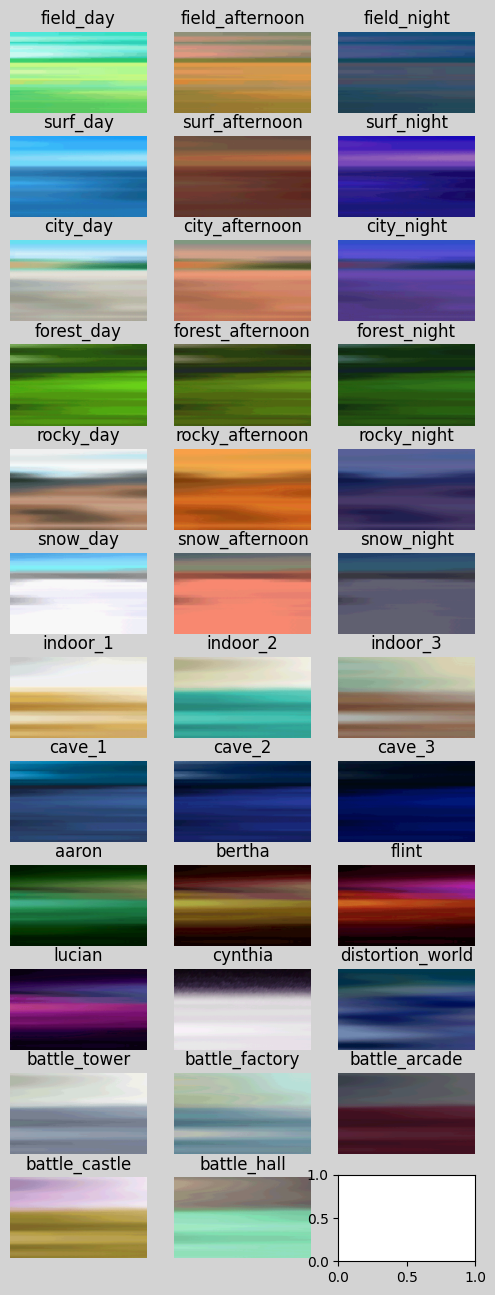

In [49]:
from PIL import Image, ImageFile
import matplotlib.axes
import matplotlib.pyplot as plt
import math

NUM_BACKGROUNDS = 35
file_path = "pokemon_pt_battle_backgrounds.png"
crops = []
nrows, ncols = math.ceil(NUM_BACKGROUNDS / 3), 3
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 16))
fig.set_facecolor("lightgray")
img = Image.open(file_path)

for i in range(NUM_BACKGROUNDS):
  row, col = i // 3, i % 3
  x1, y1 = 0, 16
  x2, y2 = 256, 168
  new_x1, new_y1 = x1 + 256 * col, y1 + 168 * row
  new_x2, new_y2 = x2 + 256 * col, y2 + 168 * row
  process(file_path, img, axes, field_names, i, new_x1, new_y1, new_x2, new_y2)
  crops.append({
      "image_name": field_names[i],
      "crop": {"x1": new_x1, "y1": new_y1, "x2": new_x2, "y2": new_y2}
  })

import json

# Save to crops.json
with open("field_crops.json", "w") as f:
    json.dump(crops, f, indent=4)  # indent=4 makes it human-readable



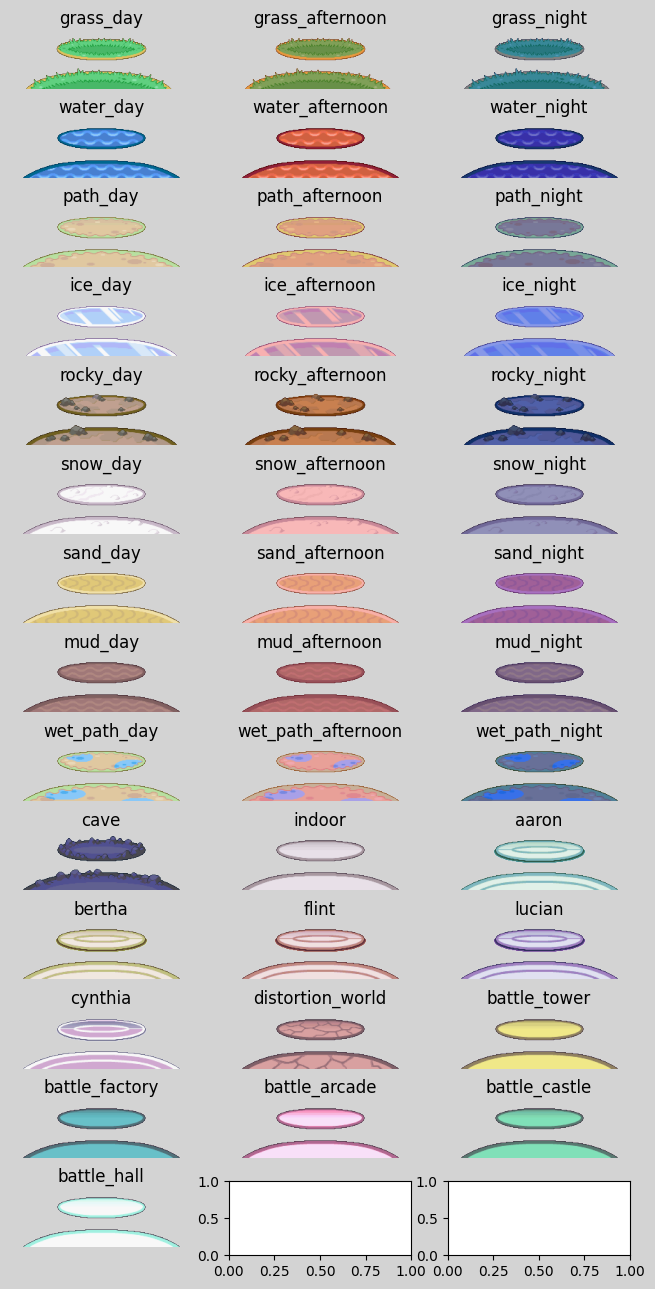

In [50]:
from PIL import Image, ImageFile
import matplotlib.axes
import matplotlib.pyplot as plt
import math

NUM_BATTLE_SPOTS = 40
file_path = "pokemon_pt_battle_backgrounds.png"
crops = []
nrows, ncols = math.ceil(NUM_BATTLE_SPOTS / 3), 3
fig, axes = plt.subplots(nrows, ncols, figsize=(8, 16))
fig.set_facecolor("lightgray")
img = Image.open(file_path)

for i in range(NUM_BATTLE_SPOTS):
  row, col = i // 3, i % 3
  x1, y1 = 768, 16
  x2, y2 = 768 + (img.width - x1) / 3, 96
  new_x1, new_y1 = x1 + 256 * col, y1 + 96 * row
  new_x2, new_y2 = x2 + 256 * col, y2 + 96 * row
  process(file_path, img, axes, battle_spot_names, i, new_x1, new_y1, new_x2, new_y2)
  crops.append({
      "image_name": battle_spot_names[i],
      "crop": {"x1": new_x1, "y1": new_y1, "x2": new_x2, "y2": new_y2}
  })

import json

# Save to crops.json
with open("battle_spot_crops.json", "w") as f:
    json.dump(crops, f, indent=4)  # indent=4 makes it human-readable



In [51]:
import json
import os
from pathlib import Path

def create_images():
  """Convert .json file to lists"""
  with open("field_crops.json") as f:
      field_data = json.load(f)

  with open("battle_spot_crops.json") as f:
      battle_spot_data = json.load(f)

  fields_dir = Path("fields/")
  battle_spots_dir = Path("battle_spots/")

  fields_dir.mkdir(exist_ok=True)
  battle_spots_dir.mkdir(exist_ok=True)

  base_sprites = Image.open("pokemon_pt_battle_backgrounds.png")

  for data in field_data:
    output_path = Path(f"{fields_dir}/{data['image_name']}.png")
    if not output_path.exists():
      img = base_sprites.crop((data["crop"]["x1"], data["crop"]["y1"], data["crop"]["x2"], data["crop"]["y2"]))
      img.save(fields_dir / f"{data['image_name']}.png")

  for data in battle_spot_data:
    output_path = Path(f"{battle_spots_dir}/{data['image_name']}.png")
    if not output_path.exists():
      img = base_sprites.crop((data["crop"]["x1"], data["crop"]["y1"], data["crop"]["x2"], data["crop"]["y2"]))
      img.save(battle_spots_dir / f"{data['image_name']}.png")


In [52]:
import random
import os
import shutil

# Remove directories for testing
dir_path = "fields"
if os.path.exists(dir_path):
    shutil.rmtree(dir_path)

dir_path = "battle_spots"
if os.path.exists(dir_path):
    shutil.rmtree(dir_path)

In [53]:
# Create image folders
create_images()

In [54]:
def split_battle_spot(file: str):
  # Split the battle spots (user and opponents battle spot)
  battle_spot = Image.open(file)
  battle_spot_left, battle_spot_right = battle_spot.crop((0, battle_spot.height / 2, 256, battle_spot.height)), battle_spot.crop((0, 0, 256, battle_spot.height / 2))
  return battle_spot_left, battle_spot_right

def show_spots(img1: Image, img2: Image):
  # --- Figure 1 ---
  fig1, ax1 = plt.subplots(figsize=(6, 3))
  fig1.patch.set_facecolor("lightblue")   # sets the *figure* background color
  ax1.set_facecolor("lightyellow")        # sets the *axes* background color
  ax1.axis("off")
  ax1.imshow(img1)
  fig1.suptitle("User Battle Spot", color="black")

  # --- Figure 2 ---
  fig2, ax2 = plt.subplots(figsize=(6, 3))
  fig2.patch.set_facecolor("lightgreen")  # sets the *figure* background color
  ax2.set_facecolor("lightpink")          # sets the *axes* background color
  ax2.axis("off")
  ax2.imshow(img2)
  fig2.suptitle("Opponent Battle Spot", color="black")

  plt.show()

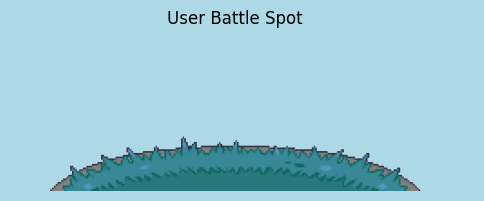

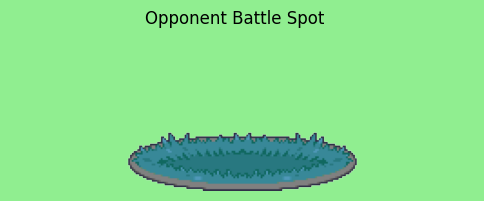

In [55]:
left, right = split_battle_spot("battle_spots/grass_night.png")
show_spots(left, right)

In [87]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

def generate_encounter(pkmn_index: int, x: int, y: int):
  dataset_dir = "../PokemonGen4/dataset/"
  rand_field = Image.open("fields/field_day.png")
  rand_spot = Image.open("battle_spots/grass_day.png")
  rand_spot_left, rand_spot_right = split_battle_spot("battle_spots/grass_day.png")
  dp_encounter, dp_sprite = Image.open(dataset_dir + f"ingame/shiny/{pkmn_index}.png"), Image.open(dataset_dir + f"sprites/{pkmn_index}/dp-s.png")

  rand_field.paste(im=rand_spot_left, box=(-64, 120), mask=rand_spot_left)
  rand_field.paste(im=rand_spot_right, box=(64, 64), mask=rand_spot_right)
  rand_field.paste(im=dp_sprite, box=(x, y), mask=dp_sprite)

  plt.figure(figsize=(24, 24))
  plt.subplot(1, 2, 1)
  plt.title("In Game Encounter")
  plt.axis("off")
  plt.imshow(dp_encounter)
  
  plt.subplot(1, 2, 2)
  plt.title("Generated Encounter")
  plt.axis("off")
  plt.imshow(rand_field)

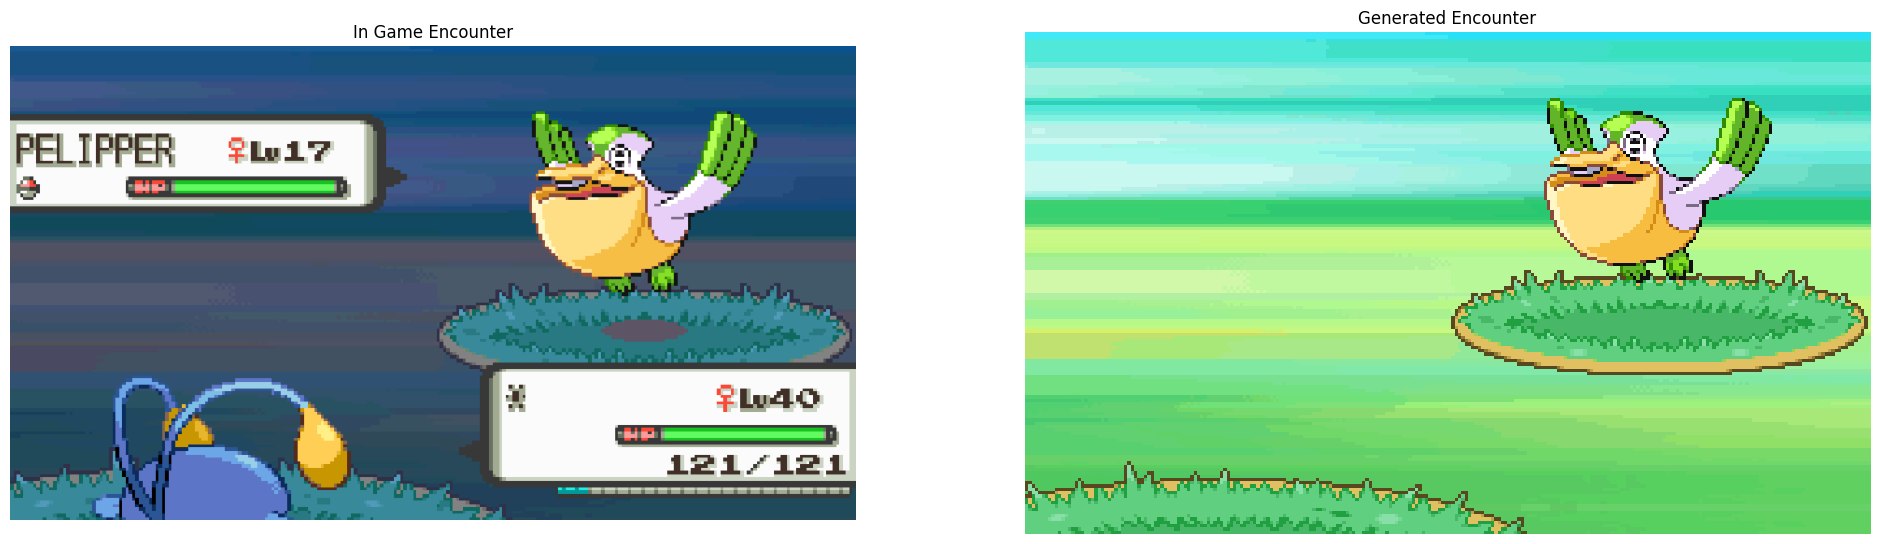

In [441]:
idx, x, y = 279, 152, 8
generate_encounter(pkmn_index=idx, x=x, y=y)

In [442]:
with open("pokemon_names.json", "r") as f:
    pokemon_names = json.load(f)
with open("encounter_info.json", "r") as f:
    try:
        encounter_dict = dict(json.load(f))
    except Exception as e:
        print({e})
        encounter_dict = {}
    encounter_dict[str(idx)] = {"x" : x, "y" : y}
with open("encounter_info.json", "w") as f:
    print(encounter_dict)
    json.dump(encounter_dict, f, indent=4)

{'1': {'x': 152, 'y': 29}, '2': {'x': 152, 'y': 28}, '3': {'x': 152, 'y': 19}, '4': {'x': 152, 'y': 27}, '5': {'x': 152, 'y': 23}, '6': {'x': 152, 'y': 12}, '7': {'x': 152, 'y': 29}, '8': {'x': 152, 'y': 23}, '9': {'x': 152, 'y': 23}, '10': {'x': 152, 'y': 31}, '11': {'x': 152, 'y': 30}, '12': {'x': 152, 'y': 9}, '13': {'x': 152, 'y': 31}, '14': {'x': 152, 'y': 28}, '15': {'x': 152, 'y': 4}, '16': {'x': 152, 'y': 33}, '17': {'x': 152, 'y': 1}, '18': {'x': 152, 'y': 19}, '19': {'x': 152, 'y': 24}, '20': {'x': 152, 'y': 25}, '21': {'x': 152, 'y': 31}, '22': {'x': 152, 'y': 4}, '23': {'x': 152, 'y': 30}, '24': {'x': 152, 'y': 18}, '25': {'x': 152, 'y': 26}, '26': {'x': 152, 'y': 21}, '27': {'x': 152, 'y': 33}, '28': {'x': 152, 'y': 24}, '29': {'x': 152, 'y': 30}, '30': {'x': 152, 'y': 26}, '31': {'x': 152, 'y': 18}, '32': {'x': 152, 'y': 30}, '33': {'x': 152, 'y': 26}, '34': {'x': 152, 'y': 22}, '35': {'x': 152, 'y': 32}, '36': {'x': 152, 'y': 23}, '37': {'x': 152, 'y': 25}, '38': {'x': 1

In [242]:
print(len(encounter_dict))

233
